In [1]:
import yaml
import netCDF4 as nc
import numpy as np
from utils.read_data import *
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from utils.ensemble_forecasting import compute_one_trajectory, compute_N_trajectories, plot_probability_after_N_hours

In [2]:
with open('configs/trace_july2014.yml', 'r') as f:
    config = yaml.safe_load(f)

# Get interpolated initial data
u10_interpolation, v10_interpolation = wind_interpolated(config['PATH_WIND'])
water_u_interpolation, water_v_interpolation = water_interpolated(config['PATH_WATER'])

true_lon, true_lat, true_time = get_true_drift_positions(config['PATH_DRIFT'])

true_lon_pos, true_lat_pos = get_closest_position(config['PATH_DRIFT'],72)



In [7]:
longitudes, latitudes, time_final = compute_one_trajectory(config['PATH_DRIFT'],water_u_interpolation, water_v_interpolation,u10_interpolation, v10_interpolation,nhours=72)

In [4]:
longitudes2, latitudes2, time_final2 = compute_one_trajectory(config['PATH_DRIFT'],water_u_interpolation, water_v_interpolation,u10_interpolation, v10_interpolation,nhours=72)

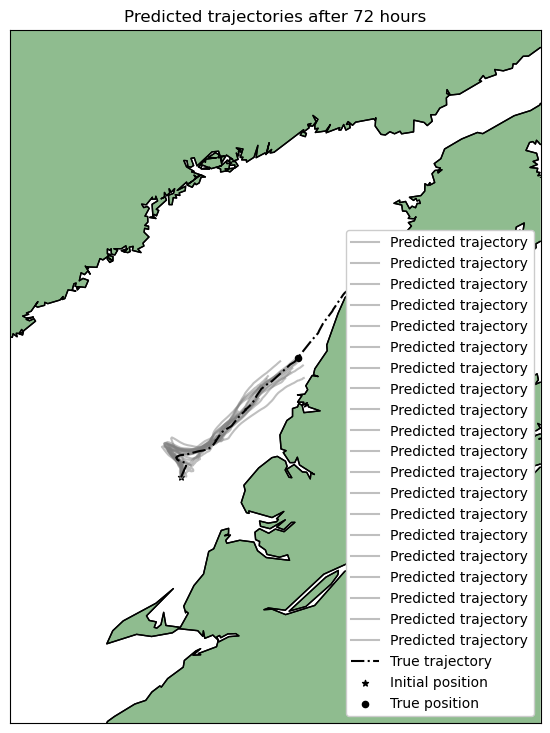

In [8]:
# setting the size of the map
fig = plt.figure(figsize=(12,9))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -71, urcrnrlon = -63, resolution = 'i') #august2015
#m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i') 
m = Basemap(projection = 'mill', llcrnrlat = 48, urcrnrlat = 52, llcrnrlon = -60, urcrnrlon = -56, resolution = 'i') #july2014
#m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -65, urcrnrlon = -59, resolution = 'i') #oct2014

# drawing the coastline
m.drawcoastlines()
#m.drawcountries(color='gray')
#m.drawstates(color='gray')
m.drawcoastlines()
m.fillcontinents(color='darkseagreen')


# plotting the map
#m.scatter(lon, lat, latlon = True, s = 10, c = 'red', marker = '.', alpha = 1)
#m.scatter(true_lon[0],true_lat[0], latlon=True,s=10,color='g',marker ='o',alpha=1)

for i in range(100): 
    longitudes, latitudes, time_final = compute_one_trajectory(config['PATH_DRIFT'],water_u_interpolation, water_v_interpolation,u10_interpolation, v10_interpolation,nhours=72)
    m.plot(longitudes,latitudes,latlon=True,linewidth=1.5,color='grey', alpha=0.5)

m.plot(true_lon,true_lat,latlon=True,linewidth=1.5,color='k', linestyle='dashdot', label='True trajectory')
m.scatter(true_lon[0], true_lat[0], latlon=True, s=20, color = 'k', marker='*', label='Initial position')
m.scatter(true_lon_pos,true_lat_pos,latlon=True,s=20,color='k', marker = 'o', label='True position')

#m.plot(longitudes2,latitudes2,latlon=True,linewidth=1.5,color='b', label='Predicted trajectory 2')
#plot grid ocean
#m.scatter(gridx_wind,gridy_wind,latlon=True,s=10,color='k',marker ='+',alpha=0.5, label='Grid for wind data')
plt.title(f'Predicted trajectories after 72 hours')

plt.legend(loc = 'lower right',framealpha=1)
plt.show()


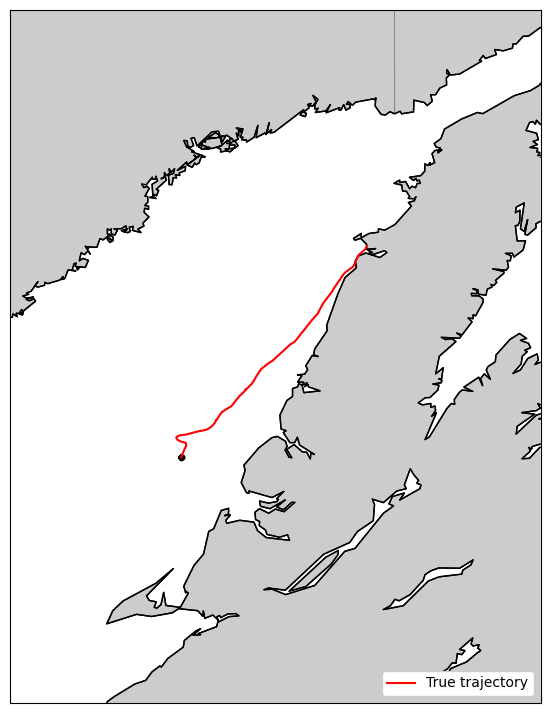

In [7]:
from utils.convert_lats import new_latitude,new_longitude

pos_1, time1 = get_initial_position(config['PATH_DRIFT'])

# setting the size of the map
fig = plt.figure(figsize=(12,9))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -71, urcrnrlon = -63, resolution = 'i') #august2015
#m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i') 
m = Basemap(projection = 'mill', llcrnrlat = 48, urcrnrlat = 52, llcrnrlon = -60, urcrnrlon = -56, resolution = 'i') #july2014
#m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -65, urcrnrlon = -59, resolution = 'i') #oct2014

# drawing the coastline
m.drawcoastlines()
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcoastlines()
m.fillcontinents()


# plotting the map
#m.scatter(lon, lat, latlon = True, s = 10, c = 'red', marker = '.', alpha = 1)
m.plot(true_lon,true_lat,latlon=True,linewidth=1.5,color='r', label='True trajectory')
m.scatter(true_lon[0],true_lat[0], latlon=True,s=10,color='g',marker ='o',alpha=1)

for i in range(20): 
    # Random perturbation for the initial position
    delta_x = np.random.normal(loc = 0.0, scale = 100/2)
    delta_y = np.random.normal(loc = 0.0, scale = 100/2)
    pos_1 = np.array([new_longitude(pos_1[1], pos_1[0],delta_x), new_latitude(pos_1[1],pos_1[0],delta_y)])
    m.scatter(pos_1[0],pos_1[1], latlon=True,s=10,color='k',marker ='o',alpha=1)

plt.legend(loc = 'lower right',framealpha=1)
plt.show()

### Compute N trajectories

In [9]:

lon_endpoints, lat_endpoints = compute_N_trajectories(config['PATH_DRIFT'],water_u_interpolation, water_v_interpolation,u10_interpolation, v10_interpolation,Ntraj=100,nhours=72)
    

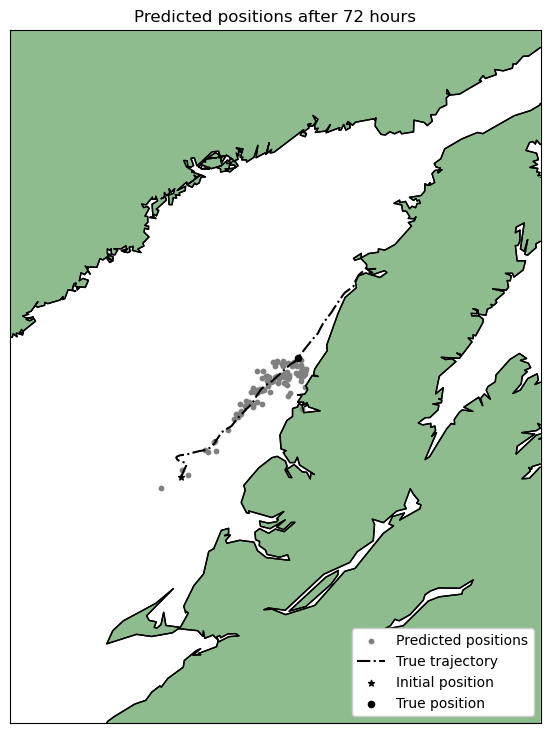

In [10]:
# setting the size of the map
fig = plt.figure(figsize=(12,9))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -71, urcrnrlon = -63, resolution = 'i') #august2015
#m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i') 
m = Basemap(projection = 'mill', llcrnrlat = 48, urcrnrlat = 52, llcrnrlon = -60, urcrnrlon = -56, resolution = 'i') #july2014
#m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -65, urcrnrlon = -59, resolution = 'i') #oct2014

# drawing the coastline
m.drawcoastlines()
#m.drawcountries(color='gray')
#m.drawstates(color='gray')
m.drawcoastlines()
m.fillcontinents(color='darkseagreen')


# plotting the map
#m.scatter(lon, lat, latlon = True, s = 10, c = 'red', marker = '.', alpha = 1)
m.scatter(lon_endpoints, lat_endpoints, latlon=True,s=10,color='grey',marker ='o',label ='Predicted positions')
m.plot(true_lon,true_lat,latlon=True,linewidth=1.5,color='k', linestyle='dashdot', label='True trajectory')
m.scatter(true_lon[0], true_lat[0], latlon=True, s=20, color = 'k', marker='*', label='Initial position')
m.scatter(true_lon_pos,true_lat_pos,latlon=True,s=20,color='k', marker = 'o', label='True position')

plt.title(f'Predicted positions after 72 hours')
plt.legend(loc = 'lower right',framealpha=1)
plt.show()

### Heatmap

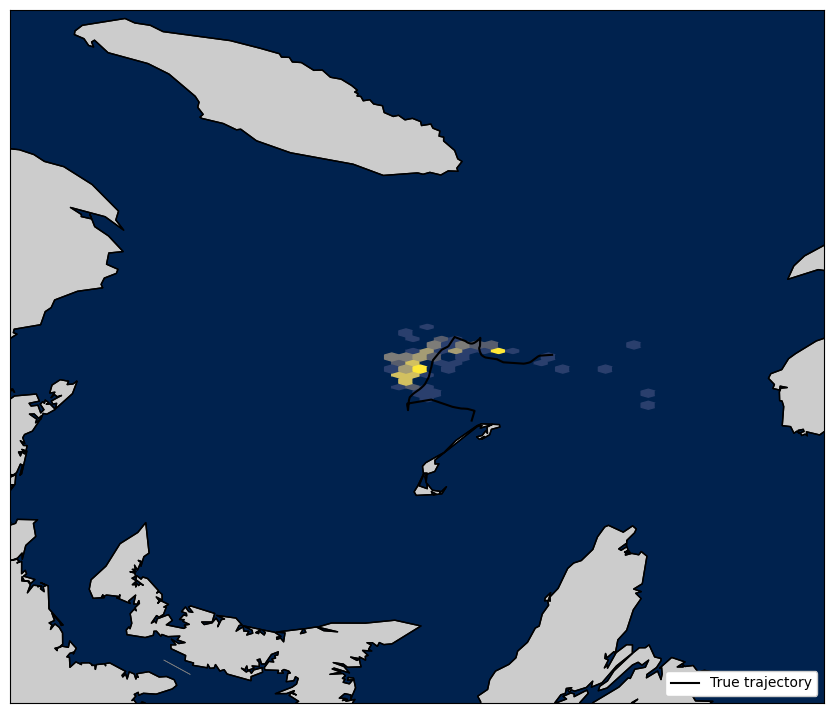

In [6]:
# setting the size of the map
fig = plt.figure(figsize=(12,9))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -71, urcrnrlon = -63, resolution = 'i') #august2015
#m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i') 
#m = Basemap(projection = 'mill', llcrnrlat = 48, urcrnrlat = 52, llcrnrlon = -60, urcrnrlon = -56, resolution = 'i') #july2014
m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -65, urcrnrlon = -59, resolution = 'i') #oct2014

x1, y1 = m(lon_endpoints, lat_endpoints)

latmin = 44
latmax = 52
lonmin = -74
lonmax = -53

xmin, ymin = m(lonmin,latmin)
xmax, ymax = m(lonmax,latmax)

#heatmap, xedges, yedges = np.histogram2d(lon_endpoints, lat_endpoints, bins=100)
#m.imshow(heatmap, interpolation='none') #, cmap=cmap.jet)
m.hexbin(x1, y1, gridsize=200, extent = (xmin,xmax,ymin,ymax), cmap='cividis')

# drawing the coastline
m.drawcoastlines()
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcoastlines()
m.fillcontinents()

# plotting the map
#m.scatter(lon, lat, latlon = True, s = 10, c = 'red', marker = '.', alpha = 1)
m.plot(true_lon,true_lat,latlon=True,linewidth=1.5,color='k', label='True trajectory')
#m.scatter(lon_endpoints, lat_endpoints, latlon=True,s=10,color='k',marker ='o',label ='Position after N hours')

plt.legend(loc = 'lower right',framealpha=1)
plt.show()

C:\Users\manon\AppData\Local\Temp\ipykernel_22968\2180175739.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df_xy, x='Longitude',y='Latitude', shade = True)


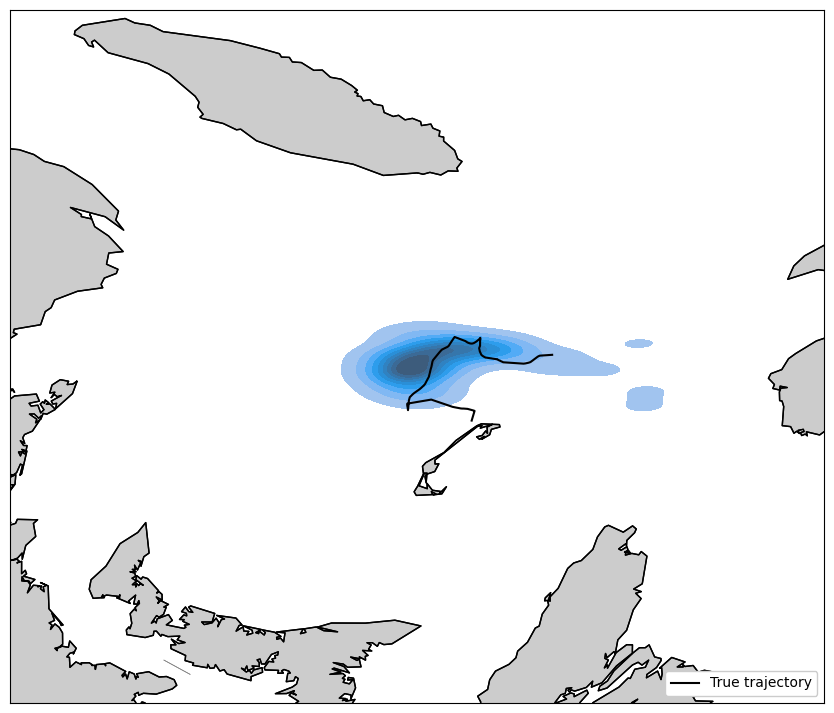

In [34]:
import seaborn as sns
import pandas as pd

# setting the size of the map
fig,ax = plt.subplots(figsize=(12,9))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -71, urcrnrlon = -63, resolution = 'i') #august2015
#m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i') 
#m = Basemap(projection = 'mill', llcrnrlat = 48, urcrnrlat = 52, llcrnrlon = -60, urcrnrlon = -56, resolution = 'i') #july2014
m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -65, urcrnrlon = -59, resolution = 'i') #oct2014

x, y  = m(lon_endpoints, lat_endpoints)

df_xy = pd.DataFrame({'Longitude': x, 'Latitude':y})
# drawing the coastline
m.drawcoastlines()
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcoastlines()
m.fillcontinents()

sns.kdeplot(data = df_xy, x='Longitude',y='Latitude', shade = True)

# plotting the map
#m.scatter(lon, lat, latlon = True, s = 10, c = 'red', marker = '.', alpha = 1)
m.plot(true_lon,true_lat,latlon=True,linewidth=1.5,color='k', label='True trajectory')
#m.scatter(lon_endpoints, lat_endpoints, latlon=True,s=10,color='k',marker ='o',label ='Position after N hours')

plt.legend(loc = 'lower right',framealpha=1)
plt.show()


### Test of the function that does this automatically

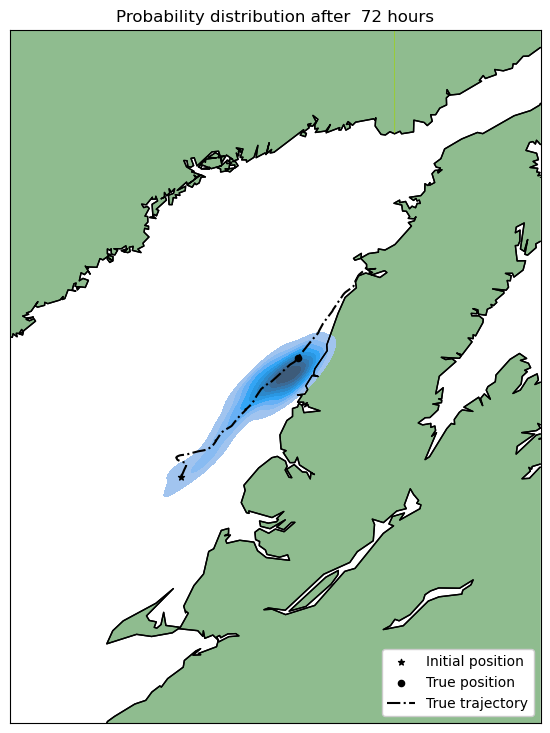

In [3]:
plot_probability_after_N_hours(config,Ntraj=100,nhours=72,latmin = 48, latmax = 52,lonmin = -60,lonmax = -56)#july2014
#plot_probability_after_N_hours(config,Ntraj=500,nhours=72,latmin = 46, latmax = 50,lonmin = -65,lonmax = -59)#oct2014